In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
# %pip install xgboost
# %pip install lightgbm
# %pip install catboost
# %pip install optuna
# %pip install imbalanced-learn

# https://medium.com/@anilcogalan/practical-guide-to-building-scalable-recommender-systems-in-python-b175547e6fce

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
%pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for scikit-surprise (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [155 lines of output]
      C:\Users\monamoe\AppData\Local\Temp\pip-build-env-c2l03s9q\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              **************************************

In [ ]:
# %pip list

Package                 Version
----------------------- -----------
asttokens               3.0.0
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.2
cycler                  0.12.1
debugpy                 1.8.14
decorator               5.2.1
executing               2.2.0
fonttools               4.57.0
ipykernel               6.29.5
ipython                 9.1.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
joblib                  1.4.2
jupyter_client          8.6.3
jupyter_core            5.7.2
kiwisolver              1.4.8
matplotlib              3.10.1
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numpy                   2.2.5
packaging               25.0
pandas                  2.2.3
parso                   0.8.4
pillow                  11.2.1
pip                     24.0
platformdirs            4.3.7
prompt_toolkit          3.0.51
psutil                  7.0.0
pure_eval               0.2.3
Pygments                2.


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


# loading data
ratings = pd.read_csv('dataset/MovieLens20MDataset/rating.csv')
movies = pd.read_csv('dataset/MovieLens20MDataset/movie.csv')
tags = pd.read_csv('dataset/MovieLens20MDataset/tag.csv')
links = pd.read_csv('dataset/MovieLens20MDataset/link.csv')

In [23]:

movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:

# combining ratings and movies
movie_ratings = pd.merge(ratings, movies, on='movieId')
movie_ratings.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


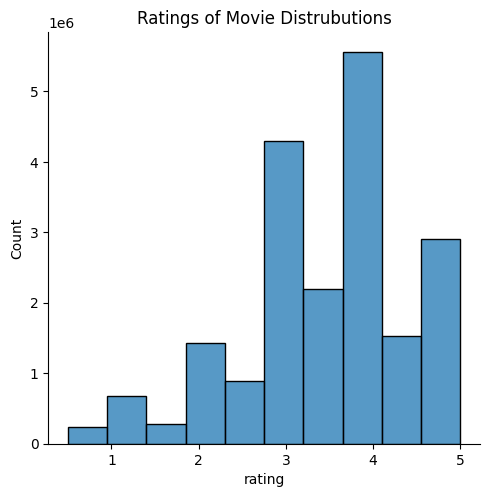

In [16]:
#exploring
sns.displot(movie_ratings['rating'], bins=10)
plt.title('Ratings of Movie Distrubutions')
plt.show()

In [17]:
# from surprise import SVD
# from surprise import Dataset
# from surprise import Reader
# from surprise.model_selection import cross_validate

# # loading data into surprise objects
# reader = Reader(rating_scale=(0.5, 5.0))
# data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)

# # SVD to train model
# cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
movies.head(5)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
# content based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TFIDF vectorizer object to extract from plot summaries of movies
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# cosine simlilarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# function to get the top n similar movies based on cosine similarity
def get_similar_movies(movie_id, n):
    movie_index= movies(movies['movie_id'] == movie_id).index[0]

    scores = list(enumerate(cosine_sim[movie_index]))
    sorted = sorted(scores, key=lambda x: x[1], reverse=True)
    
    top = []
    for i in range(1, n+1):
        top.append(movies.iloc[sorted[i][0]]['title'])

    return top

print(get_similar_movies(1, 5))

KeyError: 'movie_id'